In [1]:

from inc_import import *
from inc_charte import *
from inc_data import *



# Analyse des données


#Transformations non-linéaires

In [2]:
# Copie du dataset principal pour conserver la structure propre sans écrasement
df_transformed = dataEtudeSup.copy()

# Transformation quadratique (déjà jugée utile précédemment sur la base des log-odds)

# -> On vérifie juste si elle existe sinon on la crée
#if 'Age at enrollment^2' not in df_transformed.columns:
    #df_transformed['Age at enrollment^2'] = df_transformed['Age at enrollment'] ** 2

# Transformation logarithmique (si monotonicité observée dans les log-odds)
# -> Seulement pour les variables socio-économiques continues pertinentes (ex. Admission grade)
#df_transformed['log_Admission grade'] = np.log(df_transformed['Admission grade'])


## Définitions des paramètres

In [3]:
dataEtudeSup.head()  # Print the first rows of the dataframe

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [4]:
dataEtudeSup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   object 
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [5]:
valeurs_uniques = {col: dataEtudeSup[col].nunique() for col in dataEtudeSup.columns}
for col, n in sorted(valeurs_uniques.items(), key=lambda x: x[1]):
    print(f"{col}: {n} valeurs uniques")

Daytime/evening attendance: 2 valeurs uniques
Displaced: 2 valeurs uniques
Educational special needs: 2 valeurs uniques
Debtor: 2 valeurs uniques
Tuition fees up to date: 2 valeurs uniques
Gender: 2 valeurs uniques
Scholarship holder: 2 valeurs uniques
International: 2 valeurs uniques
Target: 3 valeurs uniques
Marital status: 6 valeurs uniques
Application order: 8 valeurs uniques
Inflation rate: 9 valeurs uniques
Curricular units 2nd sem (without evaluations): 10 valeurs uniques
Unemployment rate: 10 valeurs uniques
GDP: 10 valeurs uniques
Curricular units 1st sem (without evaluations): 11 valeurs uniques
Course: 17 valeurs uniques
Previous qualification: 17 valeurs uniques
Application mode: 18 valeurs uniques
Curricular units 2nd sem (credited): 19 valeurs uniques
Curricular units 2nd sem (approved): 20 valeurs uniques
Nacionality: 21 valeurs uniques
Curricular units 1st sem (credited): 21 valeurs uniques
Curricular units 2nd sem (enrolled): 22 valeurs uniques
Curricular units 1st sem

In [6]:
dataEtudeSup.describe()

,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,10.960895,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,26.418253,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,4.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,5.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,9.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,194.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [7]:
# dataEtudeSup[dataEtudeSup.columns].hist(bins=50, figsize=(20,15), color=chart_colors['blue'])
# plt.show

In [8]:
def plot_column_summary(df, col, notes='', color='#5486d6', figsize=(7, 3)):
    uniques = df[col].dropna().unique()
    n_uniques = len(uniques)

    # Affichage dans la console
    print(f"\nColonne : {col}")
    print(f"{n_uniques} valeurs uniques")
    if n_uniques <= 50:
        print("Valeurs : ", sorted(uniques))
    else:
        print("Valeurs : trop nombreuses pour afficher")
    print(f"Notes : \n{notes}")

    fig, ax = plt.subplots(figsize=figsize)
    plt.title(col, fontsize=12)

    if df[col].dtype.kind in 'biufc' and n_uniques > 10:
        df[col].hist(bins=30, color=color, ax=ax)
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_title('Histogramme')
        # Si valeurs discrètes 0-9, forcer ticks
        if set(range(10)).issubset(set(df[col].dropna().astype(int).unique())):
            ax.set_xticks(range(10))
            ax.set_xticklabels([str(i) for i in range(10)])
    else:
        counts = df[col].value_counts().sort_index()
        sns.barplot(x=counts.index.astype(str), y=counts.values, color=color, ax=ax)
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_title('Distribution')
        # Forcer ticks X si numérique discret
        if all(isinstance(v, (int, float)) for v in counts.index):
            ax.set_xticks(range(len(counts)))
            ax.set_xticklabels(counts.index.astype(str), rotation=0)

    plt.tight_layout()
    plt.show()


Colonne : Marital status
6 valeurs uniques
Valeurs :  ['1', '2', '3', '4', '5', '6']
Notes : 

1. single / célibataire,
2. married / marié(e),
3. widower / veuf / veuve,
4. divorced / divorcé(e),
5. facto union / union de fait (concubinage),
6. legally separated / séparé(e) légalement



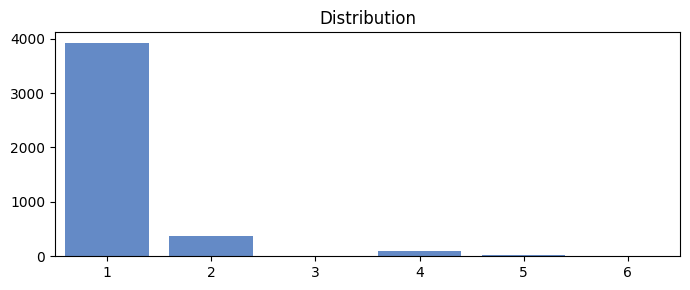

In [9]:
plot_column_summary(dataEtudeSup, 'Marital status', notes="""
1. single / célibataire,
2. married / marié(e),
3. widower / veuf / veuve,
4. divorced / divorcé(e),
5. facto union / union de fait (concubinage),
6. legally separated / séparé(e) légalement
""")



Colonne : Application mode
18 valeurs uniques
Valeurs :  [1, 2, 5, 7, 10, 15, 16, 17, 18, 26, 27, 39, 42, 43, 44, 51, 53, 57]
Notes : 

1 - 1st phase - general contingent 2 - Ordinance No. 612/93 5 - 1st phase - special contingent (Azores Island) 7 - Holders of other higher courses 10 - Ordinance No. 854-B/99 15 - International student (bachelor) 16 - 1st phase - special contingent (Madeira Island) 17 - 2nd phase - general contingent 18 - 3rd phase - general contingent 26 - Ordinance No. 533-A/99, item b2) (Different Plan) 27 - Ordinance No. 533-A/99, item b3 (Other Institution) 39 - Over 23 years old 42 - Transfer 43 - Change of course 44 - Technological specialization diploma holders 51 - Change of institution/course 53 - Short cycle diploma holders 57 - Change of institution/course (International)



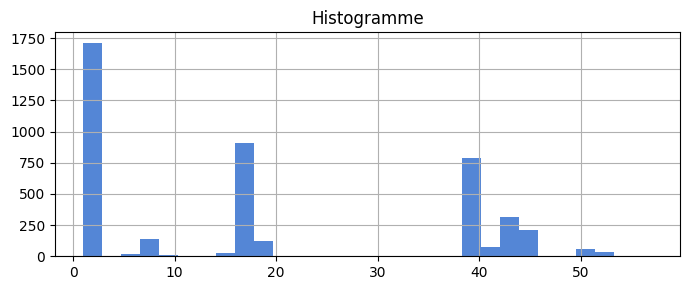

In [10]:
plot_column_summary(dataEtudeSup, 'Application mode',notes="""
1 - 1st phase - general contingent 2 - Ordinance No. 612/93 5 - 1st phase - special contingent (Azores Island) 7 - Holders of other higher courses 10 - Ordinance No. 854-B/99 15 - International student (bachelor) 16 - 1st phase - special contingent (Madeira Island) 17 - 2nd phase - general contingent 18 - 3rd phase - general contingent 26 - Ordinance No. 533-A/99, item b2) (Different Plan) 27 - Ordinance No. 533-A/99, item b3 (Other Institution) 39 - Over 23 years old 42 - Transfer 43 - Change of course 44 - Technological specialization diploma holders 51 - Change of institution/course 53 - Short cycle diploma holders 57 - Change of institution/course (International)
""")




Colonne : Application order
8 valeurs uniques
Valeurs :  [0, 1, 2, 3, 4, 5, 6, 9]
Notes : 
 Application order (between 0 - first choice; and 9 last choice)	 


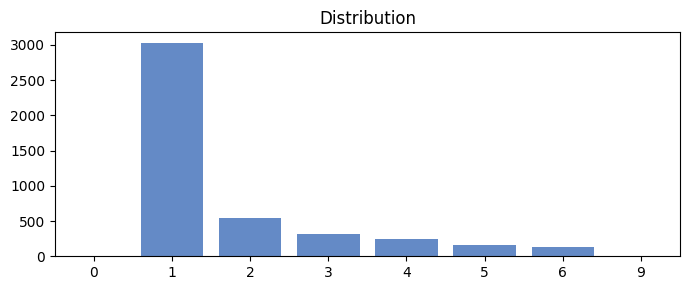

In [11]:
plot_column_summary(dataEtudeSup, 'Application order',notes=""" Application order (between 0 - first choice; and 9 last choice)	 """)




Colonne : Course
17 valeurs uniques
Valeurs :  [33, 171, 8014, 9003, 9070, 9085, 9119, 9130, 9147, 9238, 9254, 9500, 9556, 9670, 9773, 9853, 9991]
Notes : 
 Code de la filière ou du cursus suivi (17 valeurs possibles, ex. 1 = Technologies bio-carburant, 2 = Design multimédia, 3 = Service social (cours du soir), etc.)
	 


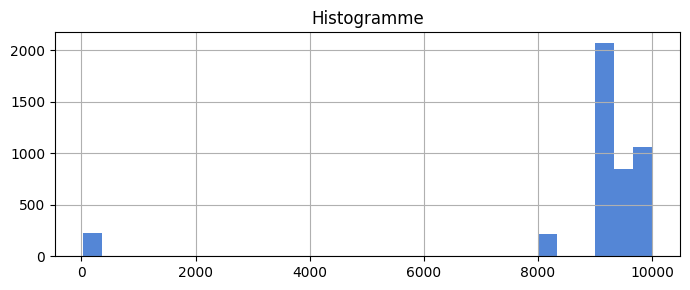

17
[  33  171 8014 9003 9070 9085 9119 9130 9147 9238 9254 9500 9556 9670
 9773 9853 9991]


In [12]:
plot_column_summary(dataEtudeSup, 'Course',notes=""" Code de la filière ou du cursus suivi (17 valeurs possibles, ex. 1 = Technologies bio-carburant, 2 = Design multimédia, 3 = Service social (cours du soir), etc.)
	 """)
print(dataEtudeSup['Course'].nunique())
print(dataEtudeSup['Course'].sort_values().unique()[:20])


Colonne : Daytime/evening attendance
2 valeurs uniques
Valeurs :  [0, 1]
Notes : 
  


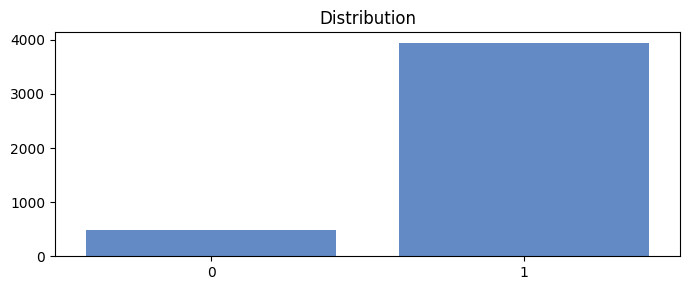

In [13]:
plot_column_summary(dataEtudeSup, 'Daytime/evening attendance',notes="""  """)


Colonne : Previous qualification
17 valeurs uniques
Valeurs :  [1, 2, 3, 4, 5, 6, 9, 10, 12, 14, 15, 19, 38, 39, 40, 42, 43]
Notes : 
  


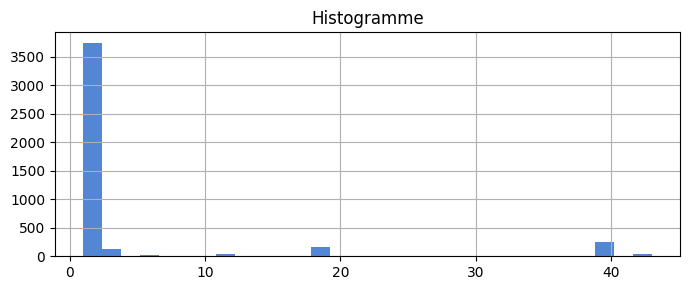

In [14]:
plot_column_summary(dataEtudeSup, 'Previous qualification',notes="""  """)


Colonne : Previous qualification (grade)
101 valeurs uniques
Valeurs : trop nombreuses pour afficher
Notes : 
  


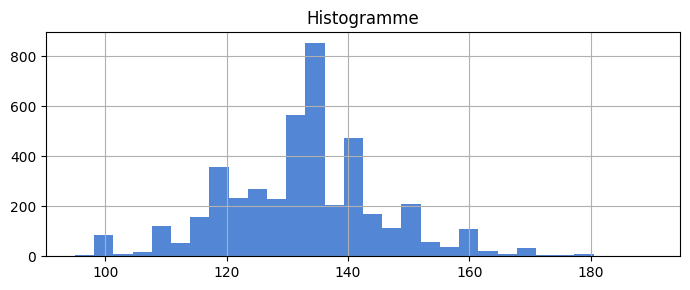

In [15]:

plot_column_summary(dataEtudeSup, 'Previous qualification (grade)',notes="""  """)


Colonne : Nacionality
21 valeurs uniques
Valeurs :  [1, 2, 6, 11, 13, 14, 17, 21, 22, 24, 25, 26, 32, 41, 62, 100, 101, 103, 105, 108, 109]
Notes : 
  


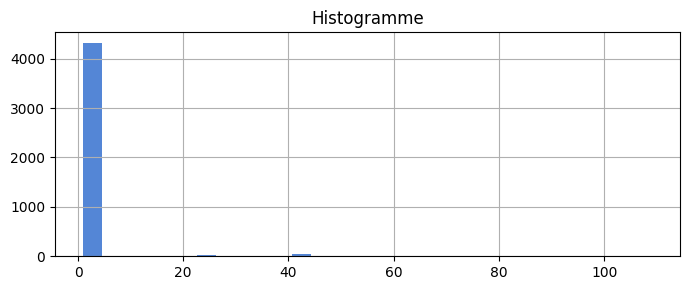

In [16]:
plot_column_summary(dataEtudeSup, 'Nacionality',notes="""  """)


Colonne : Mother's qualification
29 valeurs uniques
Valeurs :  [1, 2, 3, 4, 5, 6, 9, 10, 11, 12, 14, 18, 19, 22, 26, 27, 29, 30, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]
Notes : 
  


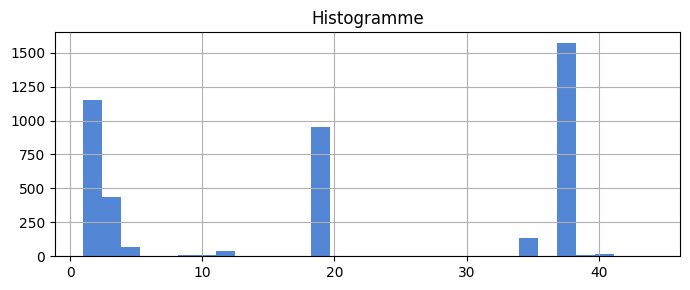


Colonne : Father's qualification
34 valeurs uniques
Valeurs :  [1, 2, 3, 4, 5, 6, 9, 10, 11, 12, 13, 14, 18, 19, 20, 22, 25, 26, 27, 29, 30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]
Notes : 
  


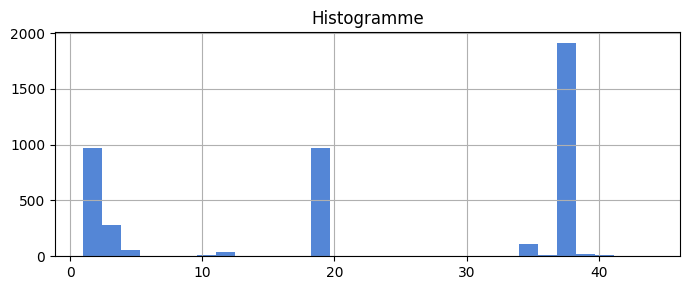

In [17]:

plot_column_summary(dataEtudeSup, "Mother's qualification",notes="""  """)
plot_column_summary(dataEtudeSup, "Father's qualification",notes="""  """)



## Etudes des données

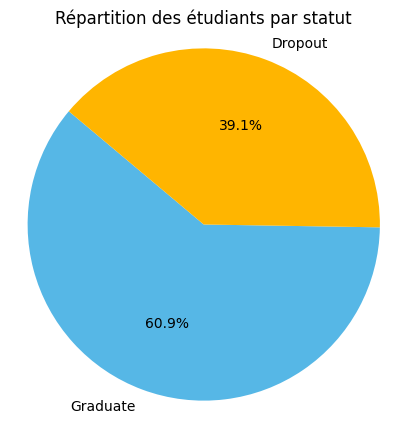

In [18]:
# ###################################
# target
# ###################################
dataEtudeSup = dataEtudeSup[dataEtudeSup["Target"] != "Enrolled"]

target_counts = dataEtudeSup['Target'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(
    target_counts,
    labels=target_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=color_list_graph  # couleurs optionnelles
)

plt.title("Répartition des étudiants par statut")
plt.axis('equal')  # Pour un cercle parfait
import plotly.graph_objects as go
plt.show()

In [19]:

gender_labels = ['F', 'M']
gender_values=dataEtudeSup['Gender'].value_counts().tolist()
fig = go.Figure()
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'pie'}, {'type':'bar'}]],horizontal_spacing = 0.25)

fig.add_trace(go.Pie(labels=gender_labels, values=gender_values, name='Gender Distribution',
                     marker_colors=["#4CAF50","#2CCED2"],hole=0.5),row=1, col=1)
att = dataEtudeSup.groupby(['Gender','Target']).agg(count =('Target','count')).reset_index()

fig.add_trace(go.Bar(x = att[att.Target =='Graduate']['Gender'], y = att[att.Target =='Graduate']["count"],
                     name = 'Graduate',
    marker = dict(color="#4CAF50")),row=1, col=2)
fig.add_trace(go.Bar(x = att[att.Target =='Dropout']['Gender'], y = att[att.Target =='Dropout']["count"],
                     name = 'Dropout',
    marker = dict(color ="#FF7043")),row=1, col=2)
fig.add_trace(go.Bar(x = att[att.Target =='Enrolled']['Gender'], y = att[att.Target =='Enrolled']["count"],
                     name = 'Enrolled',
    marker = dict(color ="#42A5F5")),row=1, col=2)

fig.update_layout(height = 500, width = 850, bargap = 0.1, xaxis = dict(tickmode ='linear'),
                  title_text ="<b>Distribution par genre</b>",paper_bgcolor ="#F4F6FB",
                  plot_bgcolor ="#F4F6FB",
                  title_font = dict(size = 20, family ='Verdana', color ='#003566'),
                  hoverlabel = dict(font_size = 13))
fig.update_layout(shapes = [dict(type ="line", xref ='paper', yref ='paper',
                                 x0 = -0.06, y0 = 1.121, x1 = 0.435, y1 = 1.121)])
fig.update_layout(legend = dict(orientation ="h", yanchor ="top", y = 1.133, xanchor ="right", x = 1.1))


fig.update_layout(
    xaxis=dict(
        tickmode='array',
        tickvals=['0', '1'],
        ticktext=['Femme', 'Homme']
    )
)

fig.show()

#Analyse de la linéarité


/tmp/ipykernel_43701/316448739.py:42: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/tmp/ipykernel_43701/316448739.py:43: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



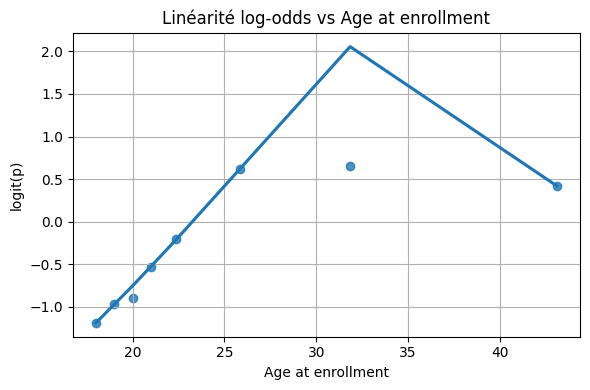

/tmp/ipykernel_43701/316448739.py:42: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/tmp/ipykernel_43701/316448739.py:43: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



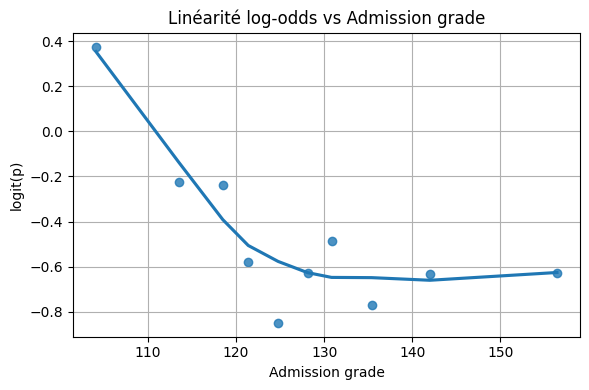

/tmp/ipykernel_43701/316448739.py:42: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/tmp/ipykernel_43701/316448739.py:43: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



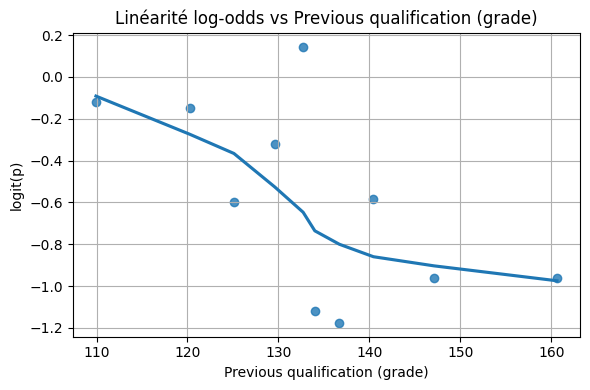

/tmp/ipykernel_43701/316448739.py:42: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/tmp/ipykernel_43701/316448739.py:43: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



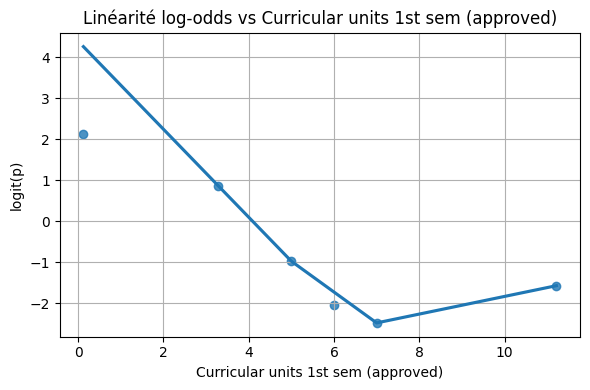

/tmp/ipykernel_43701/316448739.py:42: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/tmp/ipykernel_43701/316448739.py:43: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



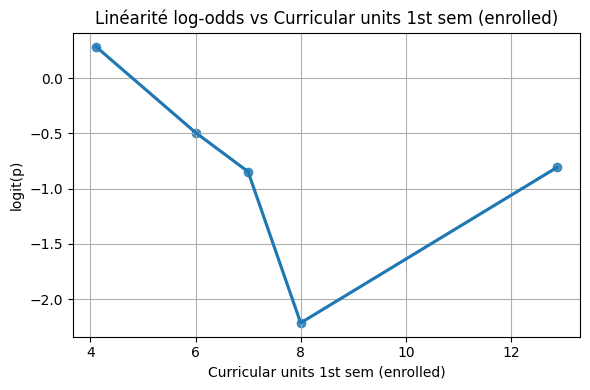

/tmp/ipykernel_43701/316448739.py:42: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/tmp/ipykernel_43701/316448739.py:43: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



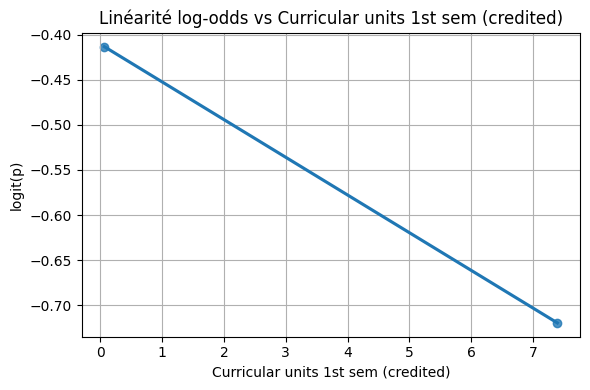

/tmp/ipykernel_43701/316448739.py:42: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/tmp/ipykernel_43701/316448739.py:43: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



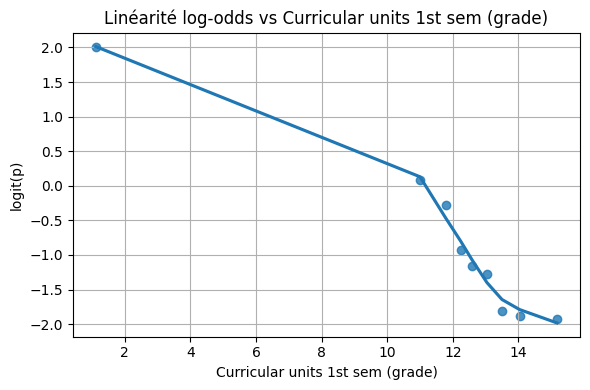

In [20]:
# Liste des variables continues à tester
variables_continues = [
    'Age at enrollment',
    'Admission grade',
    'Previous qualification (grade)',
    'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (credited)',
    'Curricular units 1st sem (grade)'
]

# la target a été déjà binarisée (Dropout = 1, sinon 0)
df_temp = dataEtudeSup.copy()

# Convert 'Target' to binary (0 for Non-Dropout, 1 for Dropout)
df_temp['Target'] = (df_temp['Target'] == 'Dropout').astype(int)


# Boucle sur chaque variable pour tracer le lien avec logit
for var in variables_continues:
    # Drop rows where the continuous variable is NaN or infinite
    df_temp_cleaned = df_temp.replace([np.inf, -np.inf], np.nan).dropna(subset=[var, 'Target'])

    # Check if there are enough unique values for qcut
    if df_temp_cleaned[var].nunique() < 10:
        print(f"Skipping {var}: Not enough unique values for binning.")
        continue

    try:
        df_temp_cleaned['bin'] = pd.qcut(df_temp_cleaned[var], q=10, duplicates='drop')  # Discrétisation en déciles
    except ValueError as e:
        print(f"Could not create 10 bins for {var}: {e}")
        # If 10 bins are not possible, try with fewer bins or skip
        try:
             df_temp_cleaned['bin'] = pd.qcut(df_temp_cleaned[var], q=5, duplicates='drop') # Try with 5 bins
             print(f"Using 5 bins for {var}.")
        except ValueError:
             print(f"Skipping {var}: Could not create enough bins.")
             continue


    grouped = df_temp_cleaned.groupby('bin')['Target'].mean()
    midpoints = df_temp_cleaned.groupby('bin')[var].mean()

    # Handle cases where grouped might have values of 0 or 1, which cause logit to be infinite
    # Replace 0 with a very small number and 1 with a number very close to 1
    grouped_clipped = grouped.clip(lower=1e-6, upper=1 - 1e-6)

    plt.figure(figsize=(6, 4))
    sns.regplot(x=midpoints, y=logit(grouped_clipped), ci=None, lowess=True)
    plt.xlabel(var)
    plt.ylabel("logit(p)")
    plt.title(f"Linéarité log-odds vs {var}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## Corrélations entre les colonnes

<function matplotlib.pyplot.show(close=None, block=None)>

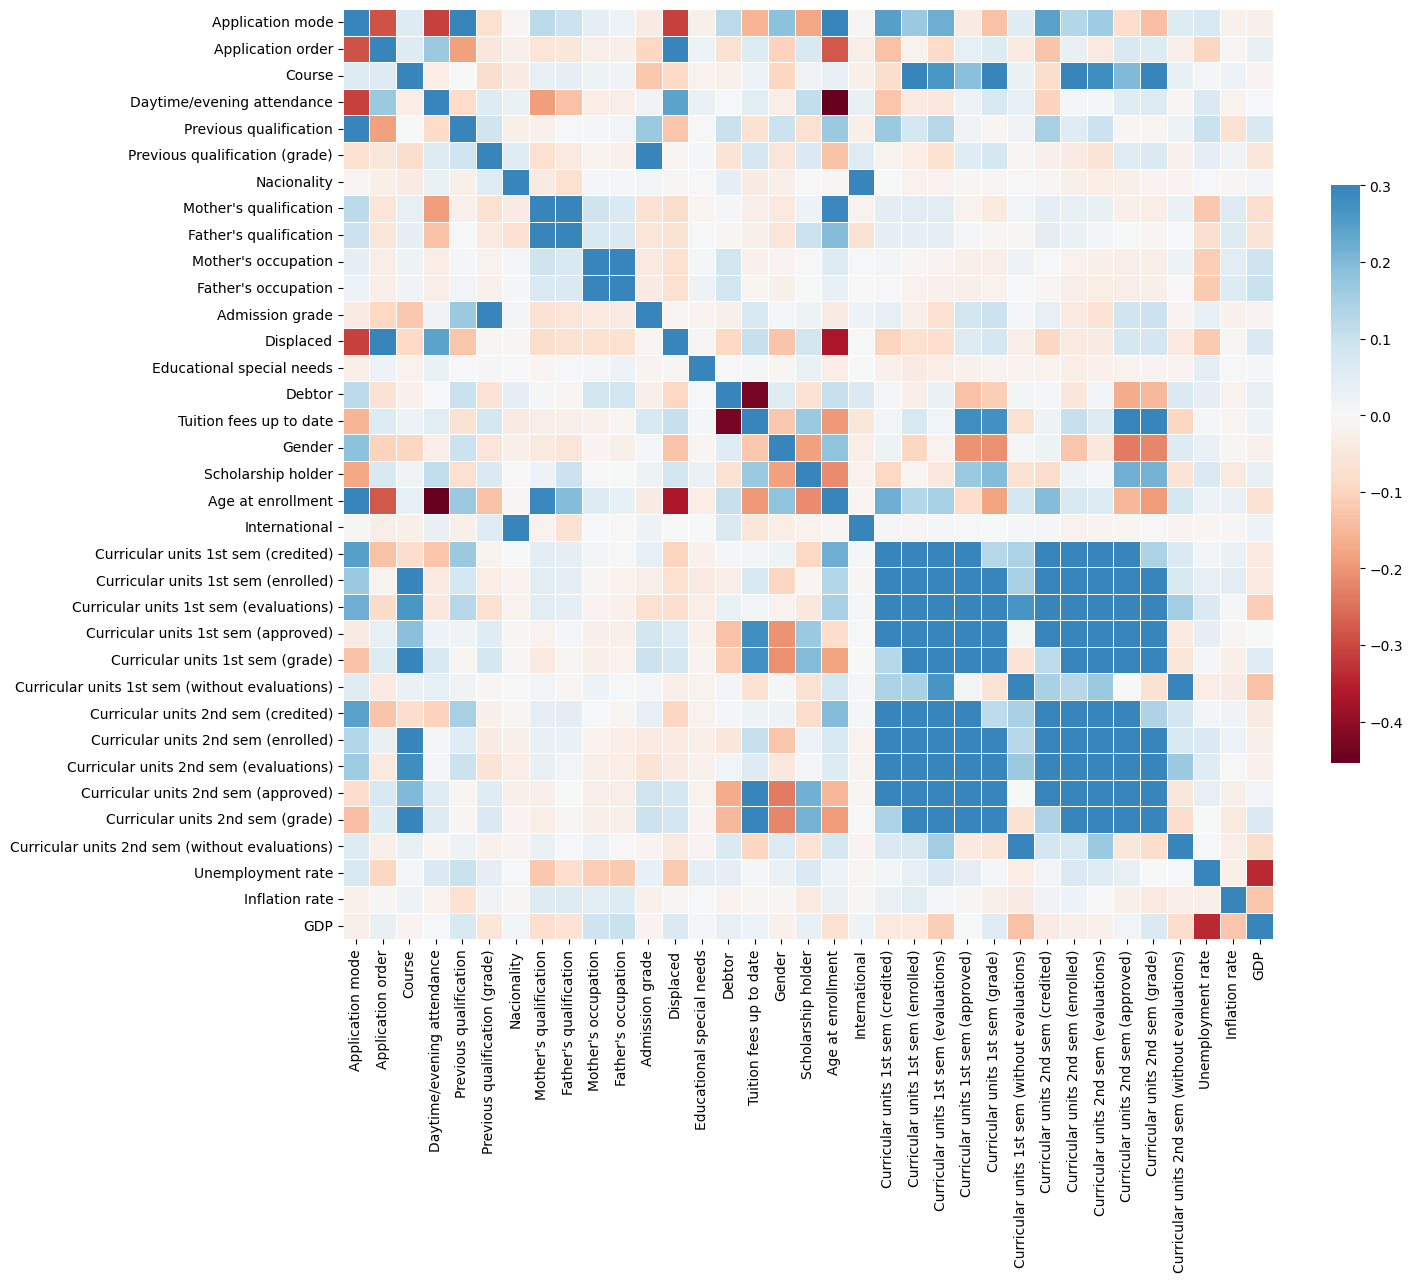

In [21]:
f = plt.figure(figsize=(15, 15))
df_numeric = dataEtudeSup.select_dtypes(include=['number'])
sns.heatmap(df_numeric.corr(),annot=False, cmap='RdBu',vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show